In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hydrotools.nwis_client.iv import IVDataService
import datetime
import matplotlib.dates as mdates
import matplotlib.units as munits
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
%matplotlib widget

In [2]:
client = IVDataService()
streamflow = client.get(
    sites="02146470",
    startDT="2019-10-01",
    endDT="2020-09-30"
    )
rainfall = client.get(
    sites="351104080521845",
    parameterCd="00045",
    startDT="2019-10-01",
    endDT="2020-09-30"
    )

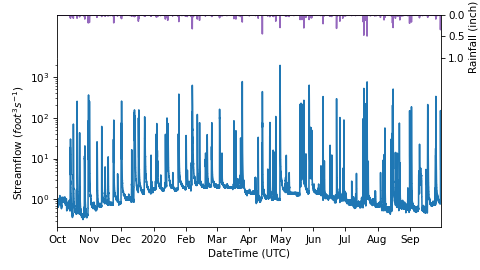

In [3]:
fig, (px, qx) = plt.subplots(ncols=1, nrows=2, figsize=(6.4, 3.6), sharex=True, dpi=75,
    gridspec_kw={"height_ratios": [1, 4], "hspace": 0}
    )
px.plot(rainfall["value_time"], rainfall["value"], "-", color="C4")
px.set_ylim(0.0, 1.0)
px.yaxis.set_label_position("right")
px.yaxis.tick_right()
px.invert_yaxis()
px.set_ylabel("Rainfall (inch)")

qx.semilogy(streamflow["value_time"], streamflow["value"], "-", color="C0")
qx.set_xlim(streamflow["value_time"].min(), streamflow["value_time"].max())
qx.set_xlabel("DateTime (UTC)")
qx.set_ylabel("Streamflow ($foot^3 s^{-1}$)")

px.spines[["bottom"]].set_visible(False)
qx.spines[["top"]].set_visible(False)
fig.tight_layout()
fig.canvas.toolbar_position = "top"
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.resizable = False
plt.show()